/tmp/ipykernel_25039/124313657.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
/tmp/ipykernel_25039/

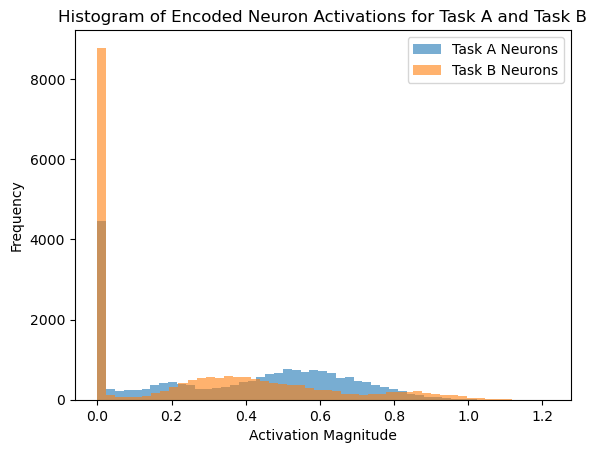

In [87]:
import sys
import os

from autoencoder import SparseAutoencoder
from utils import load_data

import torch
import matplotlib.pyplot as plt

# Ensure required directories exist
os.makedirs("models", exist_ok=True)
os.makedirs("data", exist_ok=True)

# Load saved models and activation data
task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
task_b_autoencoder = torch.load("../models/task_b_autoencoder.pth")
task_a_activations = torch.load("../data/task_a_activations.pt")
task_b_activations = torch.load("../data/task_b_activations.pt")

# Encode activations for visualization
encoded_a, _ = task_a_autoencoder(task_a_activations)
encoded_b, _ = task_b_autoencoder(task_b_activations)

# Plot histogram
plt.hist(encoded_a.detach().numpy().flatten(), bins=50, alpha=0.6, label="Task A Neurons")
plt.hist(encoded_b.detach().numpy().flatten(), bins=50, alpha=0.6, label="Task B Neurons")
plt.xlabel("Activation Magnitude")
plt.ylabel("Frequency")
plt.legend()
plt.title("Histogram of Encoded Neuron Activations for Task A and Task B")
plt.show()


In [88]:
mean_activation_a = encoded_a.mean().item()
mean_activation_b = encoded_b.mean().item()
print(f"Mean Activation for Task A: {mean_activation_a}")
print(f"Mean Activation for Task B: {mean_activation_b}")


Mean Activation for Task A: 0.37364527583122253
Mean Activation for Task B: 0.2631928324699402


In [89]:
sparsity_a = (encoded_a < 1e-3).float().mean().item()
sparsity_b = (encoded_b < 1e-3).float().mean().item()
print(f"Sparsity for Task A: {sparsity_a * 100:.2f}%")
print(f"Sparsity for Task B: {sparsity_b * 100:.2f}%")


Sparsity for Task A: 20.74%
Sparsity for Task B: 42.83%


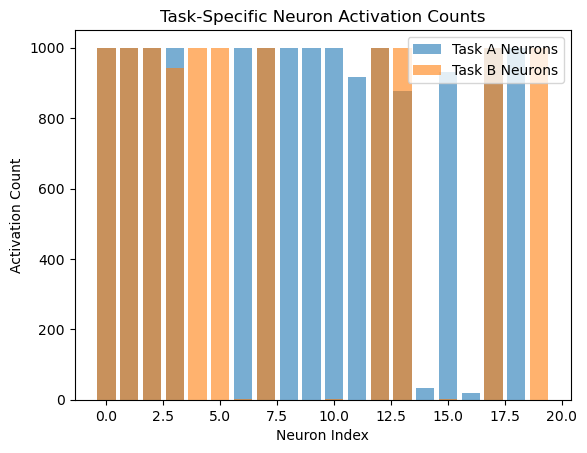

In [90]:
active_neurons_a = (encoded_a > 0.1).sum(dim=0)  # Count of times each neuron activates for Task A
active_neurons_b = (encoded_b > 0.1).sum(dim=0)  # Count of times each neuron activates for Task B

plt.bar(range(len(active_neurons_a)), active_neurons_a, alpha=0.6, label="Task A Neurons")
plt.bar(range(len(active_neurons_b)), active_neurons_b, alpha=0.6, label="Task B Neurons")
plt.xlabel("Neuron Index")
plt.ylabel("Activation Count")
plt.legend()
plt.title("Task-Specific Neuron Activation Counts")
plt.show()


/tmp/ipykernel_25039/156256385.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
/tmp/ipykernel_25039/1

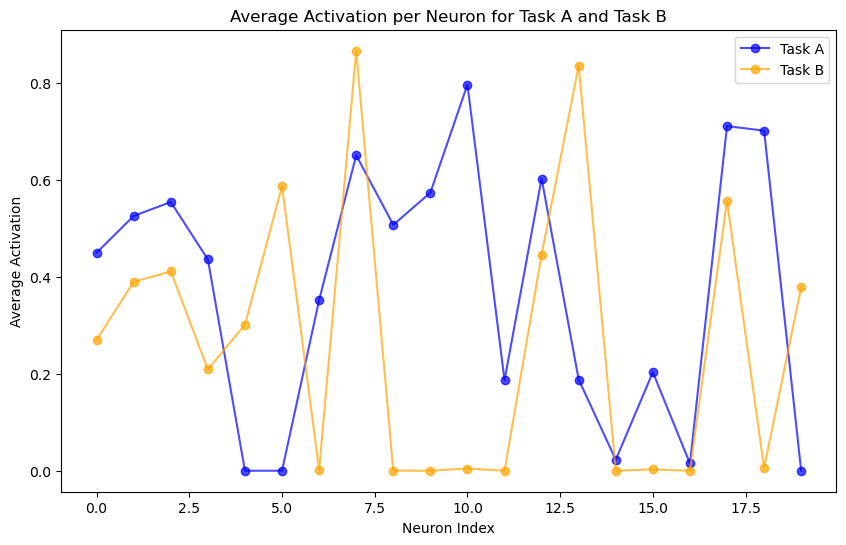

Task A Specific Neurons: [0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 15, 17, 18]
Task B Specific Neurons: [4, 5, 7, 13, 19]


In [91]:
import torch
import matplotlib.pyplot as plt

# Load the trained autoencoders and task activations
task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
task_b_autoencoder = torch.load("../models/task_b_autoencoder.pth")
task_a_activations = torch.load("../data/task_a_activations.pt")
task_b_activations = torch.load("../data/task_b_activations.pt")

# Get encoded representations for each task
encoded_a, _ = task_a_autoencoder(task_a_activations)
encoded_b, _ = task_b_autoencoder(task_b_activations)

# Convert to numpy for easy manipulation
encoded_a_np = encoded_a.detach().numpy()
encoded_b_np = encoded_b.detach().numpy()

# Calculate the average activation per neuron for each task
avg_activation_a = encoded_a_np.mean(axis=0)
avg_activation_b = encoded_b_np.mean(axis=0)

# Plot average activations for each neuron in Task A and Task B
plt.figure(figsize=(10, 6))
plt.plot(avg_activation_a, label="Task A", marker='o', linestyle='-', color="blue", alpha=0.7)
plt.plot(avg_activation_b, label="Task B", marker='o', linestyle='-', color="orange", alpha=0.7)
plt.xlabel("Neuron Index")
plt.ylabel("Average Activation")
plt.title("Average Activation per Neuron for Task A and Task B")
plt.legend()
plt.show()

# Identify task-specific neurons by checking significant differences
threshold = 0.05  # Define a threshold for considering a difference significant
task_specific_neurons = {
    "Task A Specific": [i for i, (a, b) in enumerate(zip(avg_activation_a, avg_activation_b)) if a - b > threshold],
    "Task B Specific": [i for i, (a, b) in enumerate(zip(avg_activation_a, avg_activation_b)) if b - a > threshold]
}

# Display task-specific neurons
print("Task A Specific Neurons:", task_specific_neurons["Task A Specific"])
print("Task B Specific Neurons:", task_specific_neurons["Task B Specific"])


In [92]:
def load_autoencoders():
    task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
    task_b_autoencoder = torch.load("../models/task_b_autoencoder.pth")
    return task_a_autoencoder, task_b_autoencoder

def load_activations():
    task_a_activations = torch.load("../data/task_a_activations.pt")
    task_b_activations = torch.load("../data/task_b_activations.pt")
    return task_a_activations, task_b_activations

def compute_average_activations(encoded_data):
    return encoded_data.detach().mean(axis=0).numpy()

def identify_task_specific_neurons(avg_a, avg_b, threshold=0.05):
    task_a_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if a - b > threshold]
    task_b_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if b - a > threshold]
    return task_a_specific, task_b_specific


/tmp/ipykernel_25039/3526550212.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  task_a_autoencoder = torch.load("../models/task_a_autoencoder.pth")
/tmp/ipykernel_25039/

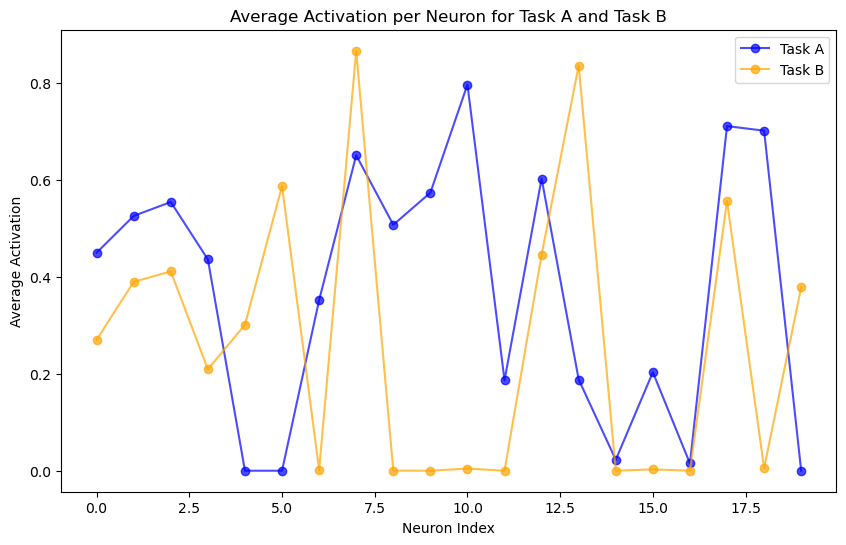

Task A Specific Neurons: [0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 15, 17, 18]
Task B Specific Neurons: [4, 5, 7, 13, 19]


In [93]:
# Load models and data
task_a_autoencoder, task_b_autoencoder = load_autoencoders()
task_a_activations, task_b_activations = load_activations()

# Get encoded representations
encoded_a, _ = task_a_autoencoder(task_a_activations)
encoded_b, _ = task_b_autoencoder(task_b_activations)

# Calculate average activations for both tasks
avg_activation_a = compute_average_activations(encoded_a)
avg_activation_b = compute_average_activations(encoded_b)

# Identify task-specific neurons
task_a_neurons, task_b_neurons = identify_task_specific_neurons(avg_activation_a, avg_activation_b)

# Plot average activations per neuron
plt.figure(figsize=(10, 6))
plt.plot(avg_activation_a, label="Task A", marker='o', linestyle='-', color="blue", alpha=0.7)
plt.plot(avg_activation_b, label="Task B", marker='o', linestyle='-', color="orange", alpha=0.7)
plt.xlabel("Neuron Index")
plt.ylabel("Average Activation")
plt.title("Average Activation per Neuron for Task A and Task B")
plt.legend()
plt.show()

print("Task A Specific Neurons:", task_a_neurons)
print("Task B Specific Neurons:", task_b_neurons)


In [94]:
from train_autoencoder import train_autoencoder
from utils import load_data, extract_activations
from multitask_model import MultitaskModel

def compute_average_activations(encoded_data):
    return encoded_data.detach().mean(axis=0).numpy()

def identify_task_specific_neurons(avg_a, avg_b, threshold=0.05):
    task_a_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if a - b > threshold]
    task_b_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if b - a > threshold]
    return task_a_specific, task_b_specific

def run_multiple_initializations(num_runs=10):
    data = load_data("../data/sample_data.pt")
    multitask_model = MultitaskModel()
    task_a_activations, task_b_activations = extract_activations(multitask_model, data)
    
    consistent_task_a_neurons = []
    consistent_task_b_neurons = []

    for run in range(num_runs):
        print(f"\nRun {run + 1}/{num_runs}")
        
        print("TEST")
        print("task_a_activations")
        print(task_a_activations)
        # Train autoencoders
        task_a_autoencoder = train_autoencoder(task_a_activations, input_dim=50, hidden_dim=20)
        task_b_autoencoder = train_autoencoder(task_b_activations, input_dim=50, hidden_dim=20)
        
        # Get encoded representations
        encoded_a, _ = task_a_autoencoder(task_a_activations)
        encoded_b, _ = task_b_autoencoder(task_b_activations)
        
        # Calculate average activations and identify task-specific neurons
        avg_a = compute_average_activations(encoded_a)
        avg_b = compute_average_activations(encoded_b)
        task_a_neurons, task_b_neurons = identify_task_specific_neurons(avg_a, avg_b)
        
        # Store the neurons for each run
        consistent_task_a_neurons.append(set(task_a_neurons))
        consistent_task_b_neurons.append(set(task_b_neurons))
    
    # Calculate intersection across all runs
    consistent_a = set.intersection(*consistent_task_a_neurons)
    consistent_b = set.intersection(*consistent_task_b_neurons)
    
    print("\nConsistently Identified Task A Specific Neurons Across Runs:", consistent_a)
    print("Consistently Identified Task B Specific Neurons Across Runs:", consistent_b)

run_multiple_initializations()



Run 1/10
TEST
task_a_activations
tensor([[0.0000, 0.4004, 0.3152,  ..., 0.0000, 0.2681, 0.0942],
        [0.0134, 0.7362, 0.0747,  ..., 0.0000, 0.2522, 0.0000],
        [0.0000, 0.0628, 0.4271,  ..., 0.0000, 0.3930, 0.1643],
        ...,
        [0.0835, 0.5413, 0.7448,  ..., 0.0000, 0.0534, 0.1325],
        [0.0505, 0.1410, 0.3418,  ..., 0.0000, 0.3045, 0.1574],
        [0.0803, 0.4363, 0.3301,  ..., 0.0868, 0.0000, 0.3053]])
Epoch 0, Loss: 0.17552264034748077
Epoch 10, Loss: 0.16881248354911804
Epoch 20, Loss: 0.15915966033935547
Epoch 30, Loss: 0.14600902795791626
Epoch 40, Loss: 0.1291651874780655
Epoch 0, Loss: 0.1786734014749527
Epoch 10, Loss: 0.1705111563205719
Epoch 20, Loss: 0.16076593101024628
Epoch 30, Loss: 0.1475837081670761
Epoch 40, Loss: 0.1304073929786682

Run 2/10
TEST
task_a_activations
tensor([[0.0000, 0.4004, 0.3152,  ..., 0.0000, 0.2681, 0.0942],
        [0.0134, 0.7362, 0.0747,  ..., 0.0000, 0.2522, 0.0000],
        [0.0000, 0.0628, 0.4271,  ..., 0.0000, 0.3930


Run 1/10
Epoch 0, Loss: 0.17640922963619232
Epoch 10, Loss: 0.17102210223674774
Epoch 20, Loss: 0.1634516417980194
Epoch 30, Loss: 0.1524253487586975
Epoch 40, Loss: 0.1379549503326416
Epoch 0, Loss: 0.17700418829917908
Epoch 10, Loss: 0.17079420387744904
Epoch 20, Loss: 0.1621915102005005
Epoch 30, Loss: 0.15030169486999512
Epoch 40, Loss: 0.13487961888313293


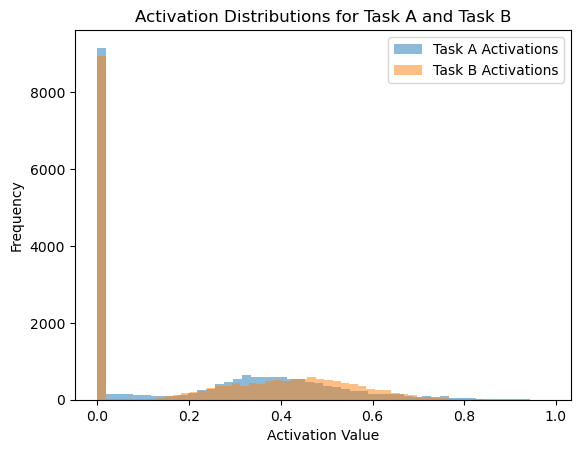


Run 2/10
Epoch 0, Loss: 0.17906026542186737
Epoch 10, Loss: 0.17277806997299194
Epoch 20, Loss: 0.16581390798091888
Epoch 30, Loss: 0.15676884353160858
Epoch 40, Loss: 0.14476467669010162
Epoch 0, Loss: 0.17740821838378906
Epoch 10, Loss: 0.1713494062423706
Epoch 20, Loss: 0.16451042890548706
Epoch 30, Loss: 0.15541137754917145
Epoch 40, Loss: 0.14301306009292603


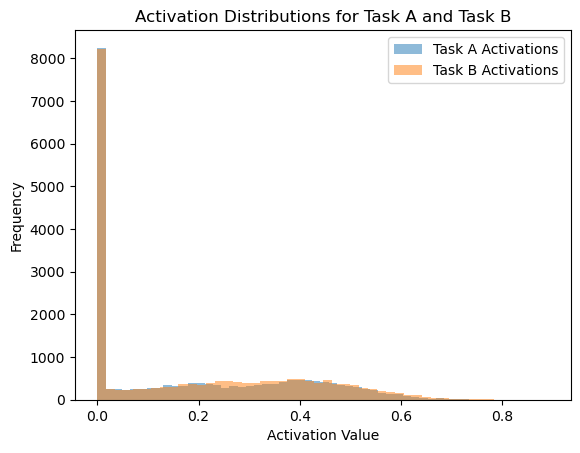


Run 3/10
Epoch 0, Loss: 0.17065376043319702
Epoch 10, Loss: 0.16621610522270203
Epoch 20, Loss: 0.16105593740940094
Epoch 30, Loss: 0.1532844752073288
Epoch 40, Loss: 0.14209654927253723
Epoch 0, Loss: 0.18411754071712494
Epoch 10, Loss: 0.17732979357242584
Epoch 20, Loss: 0.1697399616241455
Epoch 30, Loss: 0.15923108160495758
Epoch 40, Loss: 0.1448032259941101


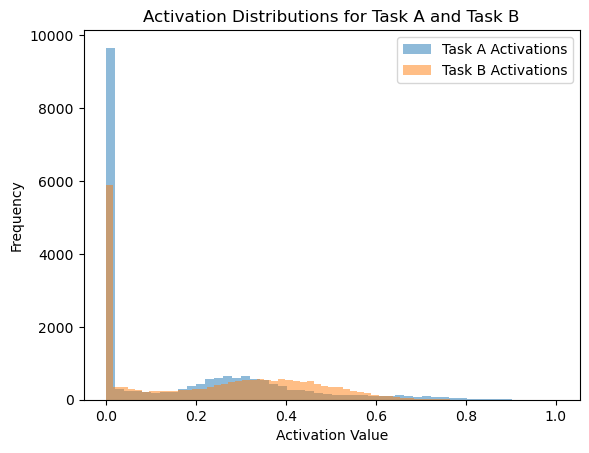


Run 4/10
Epoch 0, Loss: 0.1824900209903717
Epoch 10, Loss: 0.17656239867210388
Epoch 20, Loss: 0.16988731920719147
Epoch 30, Loss: 0.16024388372898102
Epoch 40, Loss: 0.1468120515346527
Epoch 0, Loss: 0.17505165934562683
Epoch 10, Loss: 0.17000752687454224
Epoch 20, Loss: 0.16278044879436493
Epoch 30, Loss: 0.1515868902206421
Epoch 40, Loss: 0.135966956615448


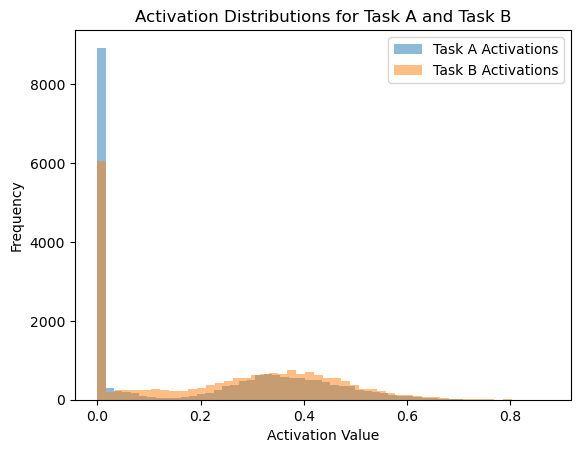


Run 5/10
Epoch 0, Loss: 0.18450318276882172
Epoch 10, Loss: 0.17702637612819672
Epoch 20, Loss: 0.16911481320858002
Epoch 30, Loss: 0.15850557386875153
Epoch 40, Loss: 0.143988236784935
Epoch 0, Loss: 0.18261608481407166
Epoch 10, Loss: 0.17716200649738312
Epoch 20, Loss: 0.1702454835176468
Epoch 30, Loss: 0.15967263281345367
Epoch 40, Loss: 0.14384466409683228


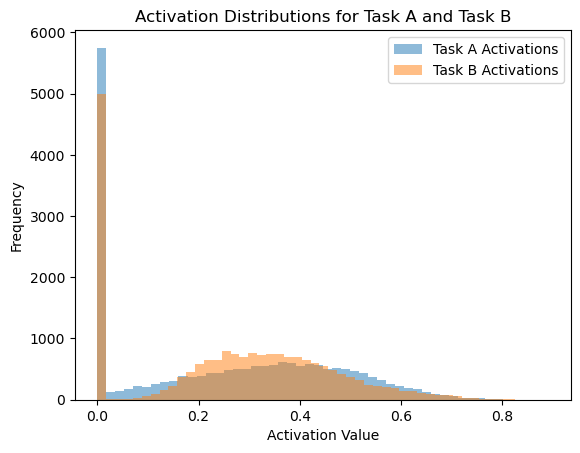


Run 6/10
Epoch 0, Loss: 0.177843376994133
Epoch 10, Loss: 0.1716432422399521
Epoch 20, Loss: 0.16378064453601837
Epoch 30, Loss: 0.15200930833816528
Epoch 40, Loss: 0.13573595881462097
Epoch 0, Loss: 0.18250775337219238
Epoch 10, Loss: 0.17741020023822784
Epoch 20, Loss: 0.17025361955165863
Epoch 30, Loss: 0.15932977199554443
Epoch 40, Loss: 0.14368154108524323


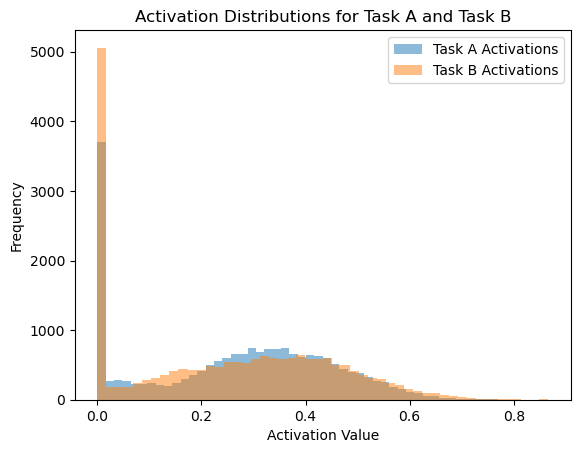


Run 7/10
Epoch 0, Loss: 0.1755308359861374
Epoch 10, Loss: 0.1697143018245697
Epoch 20, Loss: 0.16224992275238037
Epoch 30, Loss: 0.15138231217861176
Epoch 40, Loss: 0.13646294176578522
Epoch 0, Loss: 0.17184343934059143
Epoch 10, Loss: 0.16624124348163605
Epoch 20, Loss: 0.15859651565551758
Epoch 30, Loss: 0.1469021886587143
Epoch 40, Loss: 0.13048021495342255


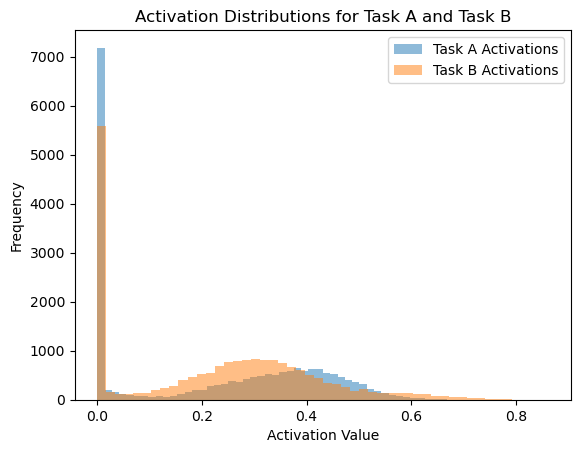


Run 8/10
Epoch 0, Loss: 0.17333418130874634
Epoch 10, Loss: 0.16754287481307983
Epoch 20, Loss: 0.16175872087478638
Epoch 30, Loss: 0.15445278584957123
Epoch 40, Loss: 0.14523284137248993
Epoch 0, Loss: 0.18311969935894012
Epoch 10, Loss: 0.17720133066177368
Epoch 20, Loss: 0.17128252983093262
Epoch 30, Loss: 0.16354621946811676
Epoch 40, Loss: 0.15314887464046478


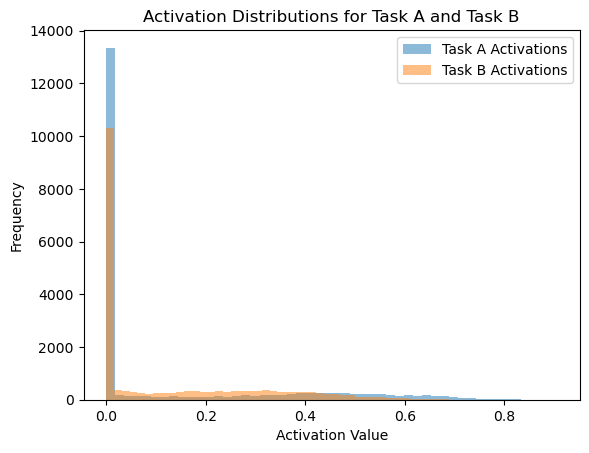


Run 9/10
Epoch 0, Loss: 0.1811358481645584
Epoch 10, Loss: 0.17558535933494568
Epoch 20, Loss: 0.1683366447687149
Epoch 30, Loss: 0.1580883264541626
Epoch 40, Loss: 0.14433105289936066
Epoch 0, Loss: 0.17751166224479675
Epoch 10, Loss: 0.17274537682533264
Epoch 20, Loss: 0.1671573668718338
Epoch 30, Loss: 0.15896449983119965
Epoch 40, Loss: 0.1473432034254074


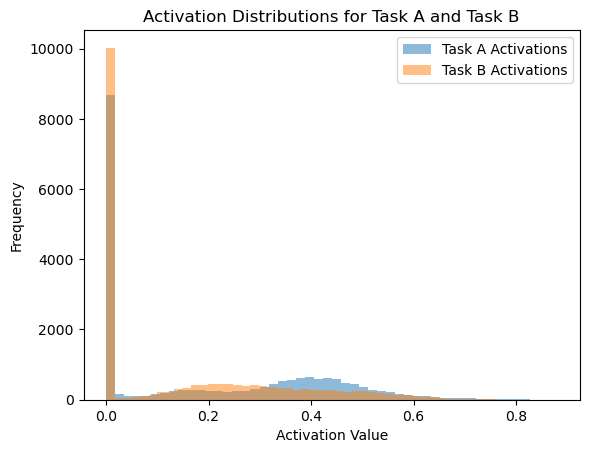


Run 10/10
Epoch 0, Loss: 0.1746770590543747
Epoch 10, Loss: 0.17035561800003052
Epoch 20, Loss: 0.16460388898849487
Epoch 30, Loss: 0.15547491610050201
Epoch 40, Loss: 0.14200839400291443
Epoch 0, Loss: 0.18283411860466003
Epoch 10, Loss: 0.17607353627681732
Epoch 20, Loss: 0.16868123412132263
Epoch 30, Loss: 0.15847021341323853
Epoch 40, Loss: 0.1443798542022705


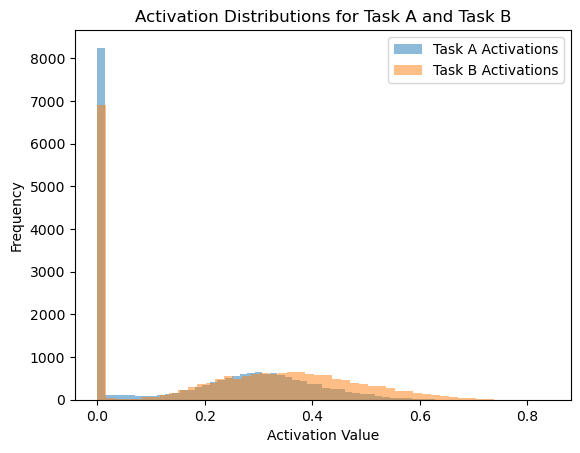


Consistently Identified Task A Specific Neurons Across Runs: set()
Consistently Identified Task B Specific Neurons Across Runs: set()


In [95]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from train_autoencoder import train_autoencoder
from utils import load_data, extract_activations
from multitask_model import MultitaskModel

def compute_average_activations(encoded_data):
    return encoded_data.detach().mean(axis=0).numpy()

def identify_task_specific_neurons(avg_a, avg_b, threshold=0.05):
    task_a_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if a - b > threshold]
    task_b_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if b - a > threshold]
    return task_a_specific, task_b_specific

def visualize_activation_distribution(encoded_a, encoded_b):
    """Plot histograms of activations for each task to compare distributions."""
    plt.hist(encoded_a.detach().numpy().flatten(), bins=50, alpha=0.5, label="Task A Activations")
    plt.hist(encoded_b.detach().numpy().flatten(), bins=50, alpha=0.5, label="Task B Activations")
    plt.xlabel("Activation Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.title("Activation Distributions for Task A and Task B")
    plt.show()

def run_multiple_initializations(num_runs=10, threshold=0.05, l1_lambda=1e-3):
    data = load_data("../data/sample_data.pt")
    multitask_model = MultitaskModel()
    task_a_activations, task_b_activations = extract_activations(multitask_model, data)
    
    consistent_task_a_neurons = []
    consistent_task_b_neurons = []

    for run in range(num_runs):
        print(f"\nRun {run + 1}/{num_runs}")
        
        # Train autoencoders
        task_a_autoencoder = train_autoencoder(task_a_activations, input_dim=50, hidden_dim=20, l1_lambda=l1_lambda)
        task_b_autoencoder = train_autoencoder(task_b_activations, input_dim=50, hidden_dim=20, l1_lambda=l1_lambda)
        
        # Get encoded representations
        encoded_a, _ = task_a_autoencoder(task_a_activations)
        encoded_b, _ = task_b_autoencoder(task_b_activations)
        
        # Calculate average activations and identify task-specific neurons
        avg_a = compute_average_activations(encoded_a)
        avg_b = compute_average_activations(encoded_b)
        task_a_neurons, task_b_neurons = identify_task_specific_neurons(avg_a, avg_b, threshold)
        
        # Store the neurons for each run
        consistent_task_a_neurons.append(set(task_a_neurons))
        consistent_task_b_neurons.append(set(task_b_neurons))

        # Visualize activation distributions for each run
        visualize_activation_distribution(encoded_a, encoded_b)
    
    # Calculate intersection across all runs
    consistent_a = set.intersection(*consistent_task_a_neurons)
    consistent_b = set.intersection(*consistent_task_b_neurons)
    
    print("\nConsistently Identified Task A Specific Neurons Across Runs:", consistent_a)
    print("Consistently Identified Task B Specific Neurons Across Runs:", consistent_b)

# Run the experiment with visualization and adjusted sparsity
run_multiple_initializations(num_runs=10, threshold=0.05, l1_lambda=1e-2)


In [96]:
from scipy.stats import ttest_ind

def identify_statistically_significant_neurons(encoded_a, encoded_b, alpha=0.05):
    p_values = []
    for i in range(encoded_a.shape[1]):
        _, p_value = ttest_ind(encoded_a[:, i].detach().numpy(), encoded_b[:, i].detach().numpy(), equal_var=False)
        p_values.append(p_value)

    # Identify neurons with p-value less than alpha (significant difference)
    task_a_specific = [i for i, p in enumerate(p_values) if p < alpha]
    return task_a_specific



In [97]:
from scipy.stats import ttest_ind

def run_statistical_consistency_check(num_runs=10, alpha=0.05):
    data = load_data("../data/sample_data.pt")
    multitask_model = MultitaskModel()
    task_a_activations, task_b_activations = extract_activations(multitask_model, data)
    
    consistent_task_a_neurons = []

    for run in range(num_runs):
        print(f"\nRun {run + 1}/{num_runs}")
        
        # Train autoencoders
        task_a_autoencoder = train_autoencoder(task_a_activations, input_dim=50, hidden_dim=20)
        task_b_autoencoder = train_autoencoder(task_b_activations, input_dim=50, hidden_dim=20)
        
        # Get encoded representations
        encoded_a, _ = task_a_autoencoder(task_a_activations)
        encoded_b, _ = task_b_autoencoder(task_b_activations)
        
        # Identify statistically significant neurons
        task_a_neurons = identify_statistically_significant_neurons(encoded_a, encoded_b, alpha)
        
        # Store the neurons for each run
        consistent_task_a_neurons.append(set(task_a_neurons))

    # Calculate intersection across all runs
    consistent_a = set.intersection(*consistent_task_a_neurons)
    print("\nConsistently Identified Task A Specific Neurons Across Runs:", consistent_a)

run_statistical_consistency_check()


/home/idacy/development/neuron_identify/src/utils.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(filepath)



Run 1/10
Epoch 0, Loss: 0.17095237970352173
Epoch 10, Loss: 0.16504992544651031
Epoch 20, Loss: 0.15780718624591827
Epoch 30, Loss: 0.1480516642332077
Epoch 40, Loss: 0.13465215265750885
Epoch 0, Loss: 0.17032115161418915
Epoch 10, Loss: 0.16398167610168457
Epoch 20, Loss: 0.15549524128437042
Epoch 30, Loss: 0.1434766948223114
Epoch 40, Loss: 0.12733151018619537

Run 2/10
Epoch 0, Loss: 0.17216916382312775
Epoch 10, Loss: 0.16576340794563293
Epoch 20, Loss: 0.15847156941890717
Epoch 30, Loss: 0.14843590557575226
Epoch 40, Loss: 0.13499349355697632
Epoch 0, Loss: 0.17787031829357147
Epoch 10, Loss: 0.17126955091953278
Epoch 20, Loss: 0.16365422308444977
Epoch 30, Loss: 0.15232637524604797
Epoch 40, Loss: 0.13633482158184052

Run 3/10
Epoch 0, Loss: 0.17077812552452087
Epoch 10, Loss: 0.16357998549938202
Epoch 20, Loss: 0.1539541333913803
Epoch 30, Loss: 0.14060285687446594
Epoch 40, Loss: 0.12357258051633835
Epoch 0, Loss: 0.1716642528772354
Epoch 10, Loss: 0.1670454442501068
Epoch 20,

In [101]:
from train_autoencoder import train_autoencoder
from utils import load_data, extract_activations
from multitask_model import MultitaskModel

def compute_average_activations(encoded_data):
    return encoded_data.detach().mean(axis=0).numpy()

def identify_task_specific_neurons(avg_a, avg_b, threshold=0.05):
    task_a_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if a - b > threshold]
    task_b_specific = [i for i, (a, b) in enumerate(zip(avg_a, avg_b)) if b - a > threshold]
    return task_a_specific, task_b_specific

def compare_average_activations(encoded_a, encoded_b, task_specific_neurons):
    avg_a = encoded_a[:, task_specific_neurons].mean(axis=0).detach().numpy()
    avg_b = encoded_b[:, task_specific_neurons].mean(axis=0).detach().numpy()
    print("Average Activations for Task A Specific Neurons (Task A):", avg_a)
    print("Average Activations for Task A Specific Neurons (Task B):", avg_b)

def run_multiple_initializations(num_runs=10):
    data = load_data("../data/sample_data.pt")
    multitask_model = MultitaskModel()
    task_a_activations, task_b_activations = extract_activations(multitask_model, data)
    
    consistent_task_a_neurons = []
    consistent_task_b_neurons = []

    for run in range(num_runs):
        print(f"\nRun {run + 1}/{num_runs}")
        
        # Train autoencoders
        task_a_autoencoder = train_autoencoder(task_a_activations, input_dim=50, hidden_dim=20)
        task_b_autoencoder = train_autoencoder(task_b_activations, input_dim=50, hidden_dim=20)
        
        # Get encoded representations
        encoded_a, _ = task_a_autoencoder(task_a_activations)
        encoded_b, _ = task_b_autoencoder(task_b_activations)
        
        # Calculate average activations and identify task-specific neurons
        avg_a = compute_average_activations(encoded_a)
        avg_b = compute_average_activations(encoded_b)
        task_a_neurons, task_b_neurons = identify_task_specific_neurons(avg_a, avg_b)
        
        # Store the neurons for each run
        consistent_task_a_neurons.append(set(task_a_neurons))
        consistent_task_b_neurons.append(set(task_b_neurons))
        
        # Compare average activations for identified task-specific neurons
        if task_a_neurons:
            print("\nTask A Specific Neurons in this run:", task_a_neurons)
            compare_average_activations(encoded_a, encoded_b, task_a_neurons)
        if task_b_neurons:
            print("\nTask B Specific Neurons in this run:", task_b_neurons)
            compare_average_activations(encoded_a, encoded_b, task_b_neurons)
    
    # Calculate intersection across all runs for consistent neurons
    consistent_a = set.intersection(*consistent_task_a_neurons) if consistent_task_a_neurons else set()
    consistent_b = set.intersection(*consistent_task_b_neurons) if consistent_task_b_neurons else set()
    
    print("\nConsistently Identified Task A Specific Neurons Across Runs:", consistent_a)
    print("Consistently Identified Task B Specific Neurons Across Runs:", consistent_b)

run_multiple_initializations()



Run 1/10
Epoch 0, Loss: 0.17057077586650848
Epoch 10, Loss: 0.16450299322605133
Epoch 20, Loss: 0.1561909317970276
Epoch 30, Loss: 0.14418546855449677
Epoch 40, Loss: 0.1281687468290329
Epoch 0, Loss: 0.17495867609977722
Epoch 10, Loss: 0.1684686690568924
Epoch 20, Loss: 0.16136334836483002
Epoch 30, Loss: 0.15137618780136108
Epoch 40, Loss: 0.13744285702705383

Task A Specific Neurons in this run: [0, 2, 4, 6, 8, 9, 15, 16, 17, 19]
Average Activations for Task A Specific Neurons (Task A): [0.6195024  0.4122146  0.61860085 0.25780335 0.5034901  0.42128554
 0.5327427  0.43204626 0.632853   0.33799115]
Average Activations for Task A Specific Neurons (Task B): [4.4840592e-01 1.3776500e-03 3.9965555e-01 8.4482762e-04 3.7852767e-01
 0.0000000e+00 4.5438403e-01 3.7219602e-01 9.9805417e-04 1.7869078e-04]

Task B Specific Neurons in this run: [1, 3, 5, 7, 11, 13]
Average Activations for Task A Specific Neurons (Task A): [0.28264022 0.         0.00172664 0.00067979 0.48398033 0.        ]
Avera

In [ ]:
import torch.nn as nn
import torch
import seaborn

# Increasing model size in MultitaskModel
class LargerMultitaskModel(nn.Module):
    def __init__(self, input_dim=100, hidden_dim=100):  # increased hidden dimension
        super(LargerMultitaskModel, self).__init__()
        self.shared_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2)  # Adding dropout for regularization
        )
        self.task_a_head = nn.Linear(hidden_dim, 1)  # Binary classification
        self.task_b_head = nn.Linear(hidden_dim, 1)  # Regression

    def forward(self, x):
        shared_representation = self.shared_layer(x)
        task_a_output = torch.sigmoid(self.task_a_head(shared_representation))
        task_b_output = self.task_b_head(shared_representation)
        return task_a_output, task_b_output

# Use the larger model for training and re-run the experiment
# You would replace the MultitaskModel in the experiment with LargerMultitaskModel.

# Heatmap Visualization for Neuron Activations
import matplotlib.pyplot as plt
import seaborn as sns

def plot_neuron_activation_heatmap(encoded_activations, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(encoded_activations.detach().cpu().numpy(), cmap="YlGnBu", cbar=True)
    plt.title(title)
    plt.xlabel("Neurons")
    plt.ylabel("Data Samples")
    plt.show()

# Example usage
# Assuming `encoded_a` is the activations from task A autoencoder for task A data
plot_neuron_activation_heatmap(encoded_a, "Task A Neuron Activations")

# Run multiple initializations with fixed random seeds
def run_fixed_seed_experiment(num_runs=10, seed=42):
    consistent_task_a_neurons = []
    consistent_task_b_neurons = []
    
    for run in range(num_runs):
        torch.manual_seed(seed + run)  # Setting a different fixed seed for each run
        # Rest of the training and analysis code goes here


ModuleNotFoundError: No module named 'seaborn'